#### Mall Customers

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans


In [89]:
df = pd.read_csv("Mall_Customers.csv")

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [91]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [92]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [93]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [94]:
df.drop(columns="CustomerID", inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [95]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

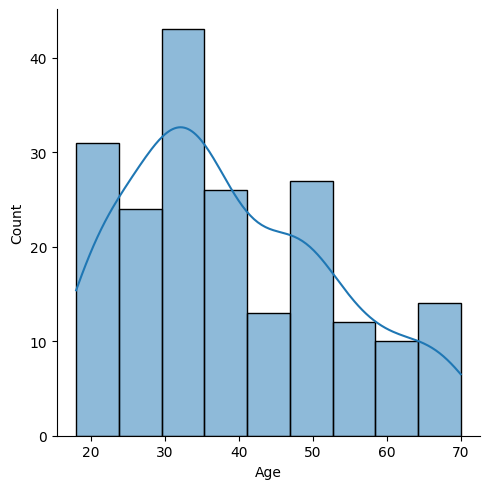

In [96]:
sns.displot(x="Age", data=df, kde=True)

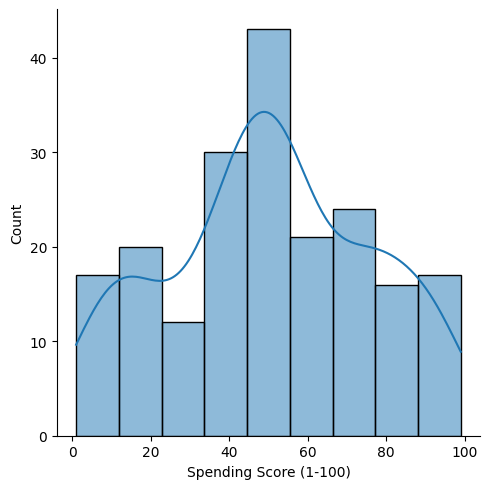

In [97]:
sns.displot(x="Spending Score (1-100)", data=df, kde=True)

<Axes: xlabel='Gender', ylabel='count'>

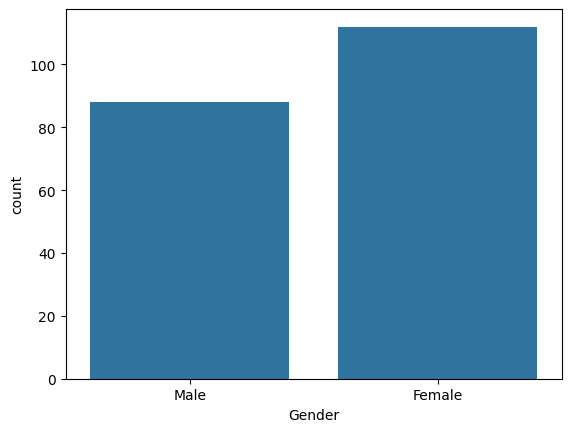

In [98]:
sns.countplot(x="Gender", data=df)

In [99]:
df=pd.get_dummies(df).reset_index(drop=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False


<Axes: >

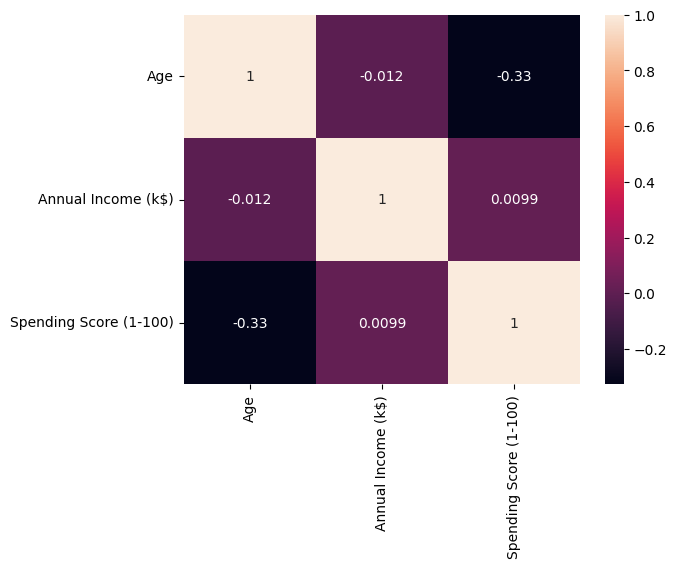

In [100]:
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True)

# Kmeans Implementation

In [101]:
X = df.iloc[:,].values
X

array([[19, 15, 39, False, True],
       [21, 15, 81, False, True],
       [20, 16, 6, True, False],
       [23, 16, 77, True, False],
       [31, 17, 40, True, False],
       [22, 17, 76, True, False],
       [35, 18, 6, True, False],
       [23, 18, 94, True, False],
       [64, 19, 3, False, True],
       [30, 19, 72, True, False],
       [67, 19, 14, False, True],
       [35, 19, 99, True, False],
       [58, 20, 15, True, False],
       [24, 20, 77, True, False],
       [37, 20, 13, False, True],
       [22, 20, 79, False, True],
       [35, 21, 35, True, False],
       [20, 21, 66, False, True],
       [52, 23, 29, False, True],
       [35, 23, 98, True, False],
       [35, 24, 35, False, True],
       [25, 24, 73, False, True],
       [46, 25, 5, True, False],
       [31, 25, 73, False, True],
       [54, 28, 14, True, False],
       [29, 28, 82, False, True],
       [45, 28, 32, True, False],
       [35, 28, 61, False, True],
       [40, 29, 31, True, False],
       [23, 29, 87

#### Elbow Method

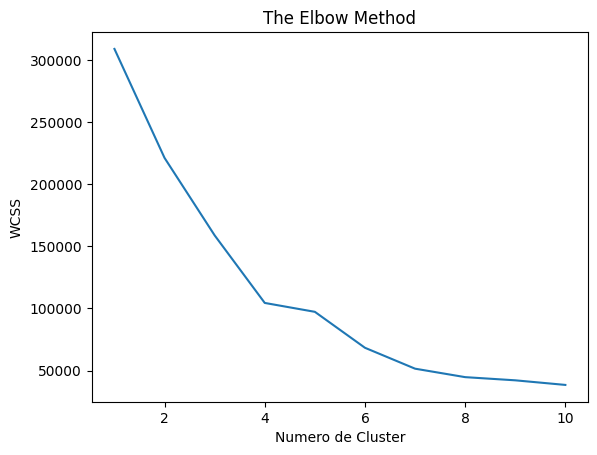

In [102]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Numero de Cluster")
plt.ylabel("WCSS")
plt.show()

In [103]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

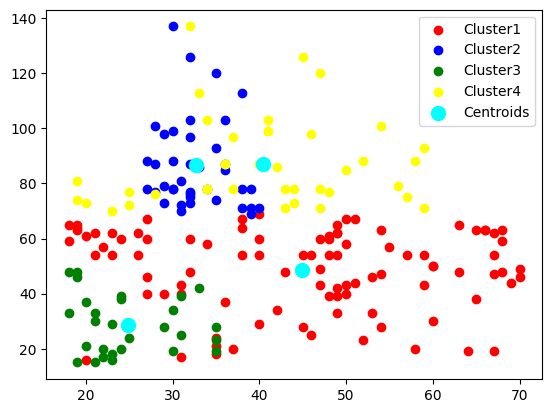

In [104]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], c="red", label="Cluster1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], c="blue", label="Cluster2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], c="green", label="Cluster3")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], c="yellow", label="Cluster4")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="cyan",label="Centroids")
plt.legend()

# DBSCAN

In [105]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [106]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

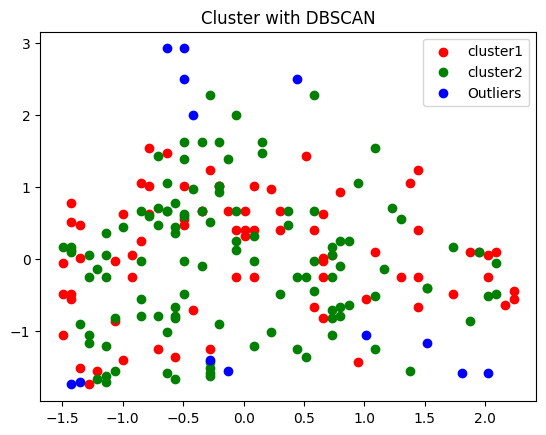

In [107]:
plt.scatter(X_scaled[y_dbscan == 0,0],X_scaled[y_dbscan == 0,1], c="red", label="cluster1")
plt.scatter(X_scaled[y_dbscan == 1,0],X_scaled[y_dbscan == 1,1], c="green", label="cluster2")
plt.scatter(X_scaled[y_dbscan == -1,0],X_scaled[y_dbscan == -1,1], c="blue", label="Outliers")
plt.title("Cluster with DBSCAN")
plt.legend()
plt.show()